In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from BCI2kReader import BCI2kReader as b2k
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image as im
import mne
from sklearn.decomposition import FastICA

In [2]:
import glob
import os
filename = "./dataset - Copy/autism/Bader_Autism_24_11_2011S001R09.dat"
with b2k.BCI2kReader(filename) as test:
        my_states = test.read(-1)
        #my_signals= test.signals
        my_signals, stateslice = test[100:1100]
       

In [3]:
raw = pd.DataFrame(my_signals)
raw = pd.DataFrame.transpose(raw)

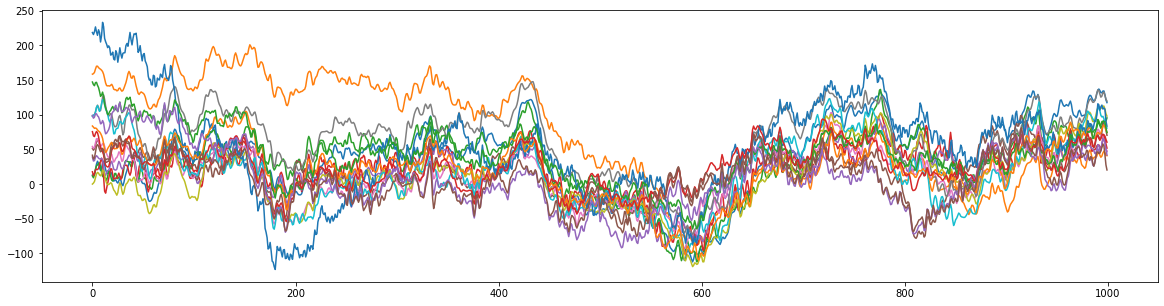

In [4]:
plt.figure(figsize = (20,5))
plt.plot(raw)

In [5]:
my_signals = np.rot90(my_signals)
data_normal = np.fft.fft2(my_signals)
fftraw = pd.DataFrame(data_normal)
#fftraw = pd.DataFrame.transpose(fftraw)

C:\Users\YAP\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


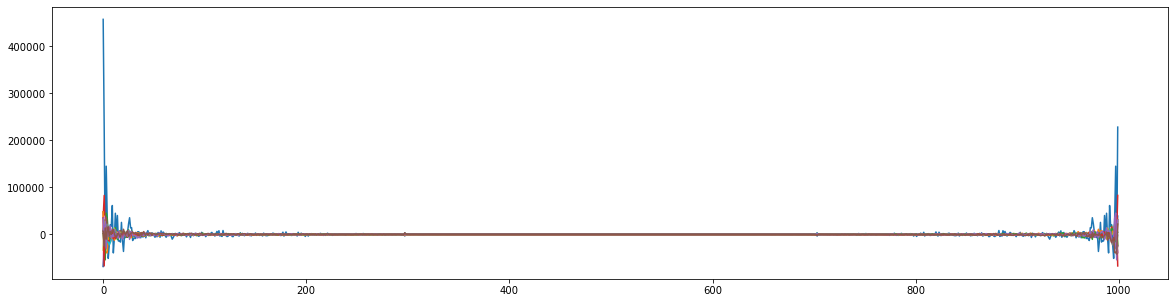

In [6]:
plt.figure(figsize = (20,5))
plt.plot(data_normal)

In [7]:
fftraw.head(1000)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,457396.53050032+0.00000000j,6671.8647840-5783.0591310j,34839.993448-76444.667396j,35366.512631-119692.907671j,2312.639946-21463.628926j,48007.213308-93735.457128j,-68075.943333+52186.889990j,7464.129531-69877.988180j,-33200.93670069+0.00000000j,7464.129531+69877.988180j,-68075.943333-52186.889990j,48007.213308+93735.457128j,2312.639946+21463.628926j,35366.512631+119692.907671j,34839.993448+76444.667396j,6671.8647840+5783.0591310j
1,228245.872836+26041.541621j,22120.566449+74774.784891j,30466.070259+6249.206907j,82975.396472+15433.450824j,4554.505180+21727.241527j,31873.222759-51724.867230j,38982.466464-42899.077357j,31214.736726-8502.733743j,27026.268569-53371.290230j,-1473.5005920+6886.0654080j,-37836.277854-30520.596200j,-38796.052887-37693.265493j,-23975.396977+3491.820887j,-67006.5770250-2743.3075730j,-23354.334653+32327.599729j,-25550.483515+35688.755150j
2,-48728.7385570-75196.7652580j,-41859.835679+39047.700741j,-54079.115128+7843.465855j,4380.668631+029928.7814370j,-253.468473-024107.5878030j,570.390805-07734.1113700j,9783.116277-29451.701770j,5525.032279-33243.283710j,-4885.244632-42515.563992j,-18405.722856-2832.113247j,-22335.843456-39691.131309j,-10210.510360-21742.516742j,-37833.099996-12998.590236j,19601.183565-24616.468071j,27322.881942-30239.448880j,13776.826522-22933.174644j
3,145137.119491+198063.022667j,-37755.422196+1376.110170j,45339.014182+34683.027147j,29864.905433+33922.750128j,-15277.253459-9837.848993j,36712.196538+16227.309270j,-8778.0336900-5404.1979770j,21360.635803-15599.707224j,3474.75143+019475.759110j,-6444.603371+10908.920195j,-13080.594086-30369.194994j,-7472.999869+17541.685357j,-23595.774438+1877.806127j,-4587.521828-011995.8491680j,-29215.649333+9518.314583j,-9999.84592-047090.322480j
4,35330.8337360-79896.3952550j,-38872.637979-4111.144611j,34493.106588-45911.996348j,-11684.4973930-8691.7614120j,11813.973906-22644.282302j,21805.8864703+799.5619150j,-5542.026714-17425.462968j,21626.481284-23916.229507j,281.063569+018362.0326180j,-16210.774888-24440.529368j,1557.4747590-8059.7243080j,-2615.6536950+7069.5495860j,4771.679070-11958.015647j,6527.335425+018352.4350220j,9457.803778+13923.724491j,7704.0593650+223.1591760j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-50992.6533060+39463.5490840j,16104.956202-16477.235372j,3534.062594+22893.316320j,5982.6319130-6982.9275460j,163.539556+09863.8130000j,-10721.904647+8884.321068j,3588.8538150+9136.9848400j,-16147.425801+17766.718848j,-4773.9753300+3520.4119280j,13239.709031+6078.102597j,668.962115+016909.1582580j,3704.1753150-2004.7106210j,7529.535895+16472.945057j,-13158.4246280+4781.2064360j,-6984.611796+18211.264368j,-6401.6655080-5496.1350430j
996,35330.8337360+79896.3952550j,7704.0593650-223.1591760j,9457.803778-13923.724491j,6527.335425-018352.4350220j,4771.679070+11958.015647j,-2615.6536950-7069.5495860j,1557.4747590+8059.7243080j,-16210.774888+24440.529368j,281.063569-018362.0326180j,21626.481284+23916.229507j,-5542.026714+17425.462968j,21805.8864703-799.5619150j,11813.973906+22644.282302j,-11684.4973930+8691.7614120j,34493.106588+45911.996348j,-38872.637979+4111.144611j
997,145137.119491-198063.022667j,-9999.84592+047090.322480j,-29215.649333-9518.314583j,-4587.521828+011995.8491680j,-23595.774438-1877.806127j,-7472.999869-17541.685357j,-13080.594086+30369.194994j,-6444.603371-10908.920195j,3474.75143-019475.759110j,21360.635803+15599.707224j,-8778.0336900+5404.1979770j,36712.196538-16227.309270j,-15277.253459+9837.848993j,29864.905433-33922.750128j,45339.014182-34683.027147j,-37755.422196-1376.110170j
998,-48728.7385570+75196.7652580j,13776.826522+22933.174644j,27322.881942+30239.448880j,19601.183565+24616.468071j,-37833.099996+12998.590236j,-10210.510360+21742.516742j,-22335.843456+39691.131309j,-18405.722856+2832.113247j,-4885.244632+42515.563992j,5525.032279+33243.283710j,9783.116277+29451.701770j,570.390805+07734.1113700j,-253.468473+024107.5878030j,4380.668631-029928.78

In [3]:
import glob
import os
filename = "./dataset - Copy/autism/Bader_Autism_24_11_2011S001R09.dat"
with b2k.BCI2kReader(filename) as test:
        my_states = test.read()
        #my_signals= test.signals
        my_signals, stateslice = test[100:1100]
        
        my_signals = my_signals.reshape(1, 16, 1000)

In [4]:
my_signals

array([[[ 13.068   ,  11.913   ,  13.464   , ..., 128.634   ,
         121.374   , 117.414   ],
        [158.433   , 159.159   , 161.007   , ...,  45.276   ,
          41.283   ,  41.019   ],
        [ 11.715   ,   9.075   ,  13.53    , ...,  90.09    ,
          90.816   ,  95.37    ],
        ...,
        [ 75.537   ,  69.63    ,  68.508   , ...,  65.538   ,
          57.849   ,  51.876   ],
        [ 98.934   ,  94.974   ,  96.525   , ...,  60.093   ,
          50.259   ,  41.975998],
        [ 41.547   ,  36.003   ,  37.850998, ...,  42.075   ,
          27.522   ,  20.361   ]]], dtype=float32)

In [30]:
df_normal = pd.DataFrame([], )
label = 'NORMAL'
for filename in glob.glob('./dataset - Copy/normal/*.dat'):
    with b2k.BCI2kReader(filename) as test:
        my_states = test.read()
        my_signals, stateslice = test[100:1100]
        #my_signals = my_signals.reshape(1, 16, 1000)
        raw = np.stack((my_signals, my_signals))

In [31]:
raw.shape

(2, 16, 1000)